# Time Series analysis of House Price Index and GDP in Atlanta

## Load datasets

In [140]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# File to Load: Atlanta Housing Price Index and GDP for Atlanta
atl_hpi_csv = "Downloads/ATXRSA.csv"
atl_gdp_csv = "Downloads/NGMP12060.csv"

# Read Purchasing File and store into Pandas data frame
atl_hpi = pd.read_csv(atl_hpi_csv)
atl_gdp = pd.read_csv(atl_gdp_csv)

In [123]:
atl_hpi

,DATE,ATXRSA
0,2001-01-01,107.072559
1,2001-02-01,107.431199
2,2001-03-01,107.818068
3,2001-04-01,108.354885
4,2001-05-01,108.647883
...,...,...
200,2017-09-01,139.358409
201,2017-10-01,139.867354
202,2017-11-01,140.670570
203,2017-12-01,141.648752


In [124]:
atl_hpi.drop(atl_hpi.tail(1).index,inplace=True)
atl_hpi

,DATE,ATXRSA
0,2001-01-01,107.072559
1,2001-02-01,107.431199
2,2001-03-01,107.818068
3,2001-04-01,108.354885
4,2001-05-01,108.647883
...,...,...
199,2017-08-01,138.191174
200,2017-09-01,139.358409
201,2017-10-01,139.867354
202,2017-11-01,140.670570


In [125]:
atl_gdp

,DATE,NGMP12060
0,2001-01-01,209741.698
1,2002-01-01,214808.823
2,2003-01-01,223499.568
3,2004-01-01,239580.610
4,2005-01-01,255967.628
5,2006-01-01,263617.009
6,2007-01-01,271327.784
7,2008-01-01,267967.059
8,2009-01-01,261817.867
9,2010-01-01,268736.276


## House Price Index

In [126]:
#Get average HPI every year
s = pd.Series(atl_hpi.index // 12)
df = atl_hpi[s.groupby(s).transform('count') == 12]
avg_hpi = df.groupby(df.index // 12).agg({'DATE':'first', 'ATXRSA':'mean'})

#Rename the column
avg_hpi.rename(columns={'ATXRSA': 'Average HPI'}, inplace=True)
avg_hpi

,DATE,Average HPI
0,2001-01-01,109.390821
1,2002-01-01,113.521723
2,2003-01-01,117.151922
3,2004-01-01,121.407300
4,2005-01-01,127.609843
5,2006-01-01,133.121986
6,2007-01-01,134.004122
7,2008-01-01,122.643740
8,2009-01-01,108.397927
9,2010-01-01,105.784091


## Atlanta GDP

In [127]:
#Rename the column
atl_gdp.rename(columns={'NGMP12060': 'Atlanta GDP (Millions)'}, inplace=True)
atl_gdp

,DATE,Atlanta GDP (Millions)
0,2001-01-01,209741.698
1,2002-01-01,214808.823
2,2003-01-01,223499.568
3,2004-01-01,239580.610
4,2005-01-01,255967.628
5,2006-01-01,263617.009
6,2007-01-01,271327.784
7,2008-01-01,267967.059
8,2009-01-01,261817.867
9,2010-01-01,268736.276


## Combine into one dataset

In [128]:
merge_data = pd.merge (avg_hpi, atl_gdp, on = "DATE")
merge_data

,DATE,Average HPI,Atlanta GDP (Millions)
0,2001-01-01,109.390821,209741.698
1,2002-01-01,113.521723,214808.823
2,2003-01-01,117.151922,223499.568
3,2004-01-01,121.407300,239580.610
4,2005-01-01,127.609843,255967.628
5,2006-01-01,133.121986,263617.009
6,2007-01-01,134.004122,271327.784
7,2008-01-01,122.643740,267967.059
8,2009-01-01,108.397927,261817.867
9,2010-01-01,105.784091,268736.276


In [129]:
#Change the unit for GDP
merge_data['Atlanta GDP (Millions)'] = merge_data['Atlanta GDP (Millions)'].div(1000)
merge_data.rename(columns={'Atlanta GDP (Millions)': 'Atlanta GDP (Billions)'}, inplace=True)

merge_data

,DATE,Average HPI,Atlanta GDP (Billions)
0,2001-01-01,109.390821,209.741698
1,2002-01-01,113.521723,214.808823
2,2003-01-01,117.151922,223.499568
3,2004-01-01,121.407300,239.580610
4,2005-01-01,127.609843,255.967628
5,2006-01-01,133.121986,263.617009
6,2007-01-01,134.004122,271.327784
7,2008-01-01,122.643740,267.967059
8,2009-01-01,108.397927,261.817867
9,2010-01-01,105.784091,268.736276


# Time Series Line Chart

In [130]:
#Set time index
date_rng = pd.date_range(start='2001', end='2017', freq='AS')
date_rng

DatetimeIndex(['2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [131]:
#Add time series data
merge_data["Date"] = date_rng
#Drop the previous "DATA" column
merge_data.drop(columns=["DATE"], inplace=True)

In [133]:
#Move Date to the front
merge_data = merge_data[ ['Date'] + [ col for col in merge_data.columns if col != 'Date' ] ]
merge_data

,Date,Average HPI,Atlanta GDP (Billions)
0,2001-01-01,109.390821,209.741698
1,2002-01-01,113.521723,214.808823
2,2003-01-01,117.151922,223.499568
3,2004-01-01,121.407300,239.580610
4,2005-01-01,127.609843,255.967628
5,2006-01-01,133.121986,263.617009
6,2007-01-01,134.004122,271.327784
7,2008-01-01,122.643740,267.967059
8,2009-01-01,108.397927,261.817867
9,2010-01-01,105.784091,268.736276


In [139]:
#Export to csv
merge_data.to_csv("ellie_ts.csv")


In [143]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=merge_data.Date, y=merge_data['Average HPI'], name="Average HPI",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=merge_data.Date, y=merge_data['Atlanta GDP (Billions)'], name="Atlanta GDP (Billions)",
                         line_color='dimgray'))

fig.update_layout(title_text='Atlanta House Price Index vs. GDP Time Series',
                  xaxis_rangeslider_visible=True)

fig.show()

In [144]:
import os

if not os.path.exists("Pjt1"):
    os.mkdir("Pjt1")

In [146]:
fig.write_image("Pjt1/ellie_ts.png")

## Regression

In [160]:
import statsmodels.api as sm

In [162]:
model = sm.OLS(merge_data['Average HPI'], merge_data[['Atlanta GDP (Billions)']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Average HPI   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              568.9
Date:                Tue, 04 Feb 2020   Prob (F-statistic):                    6.23e-14
Time:                        21:51:43   Log-Likelihood:                         -74.674
No. Observations:                  17   AIC:                                      151.3
Df Residuals:                      16   BIC:                                      152.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

/Users/elliezhang/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17



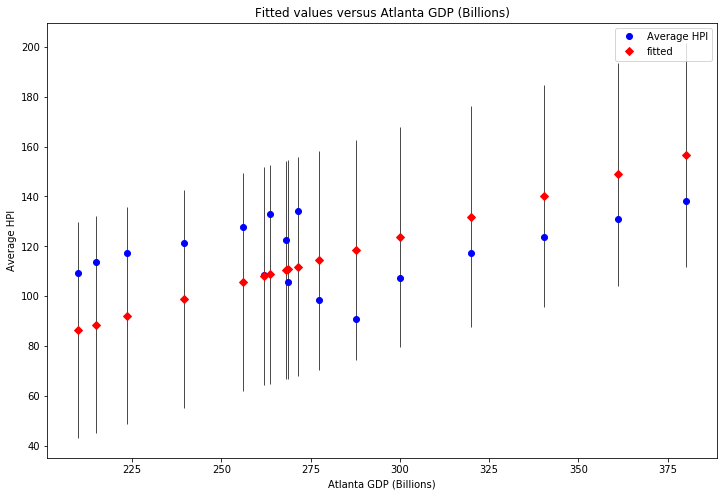

In [164]:
#Fit Plot
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results, "Atlanta GDP (Billions)", ax=ax)